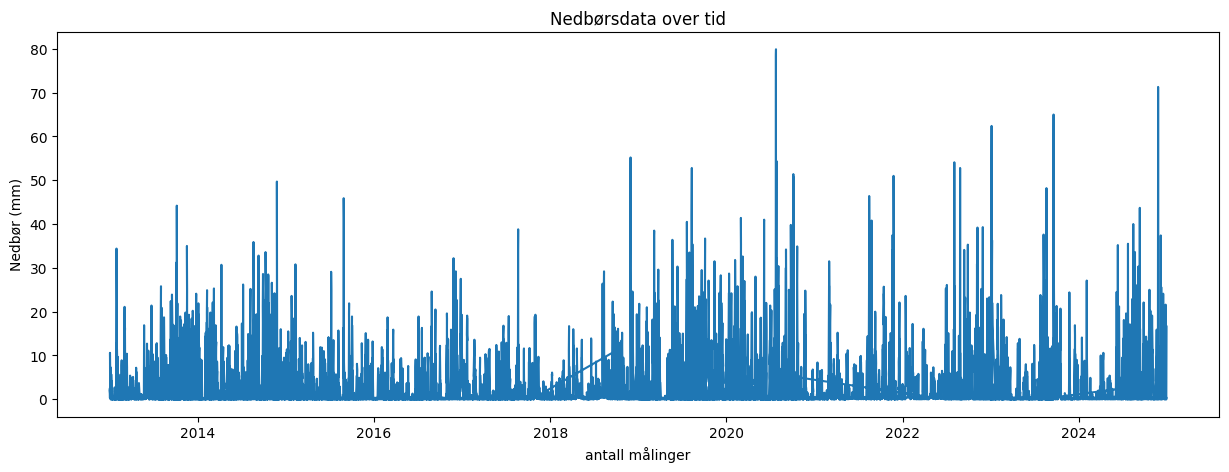

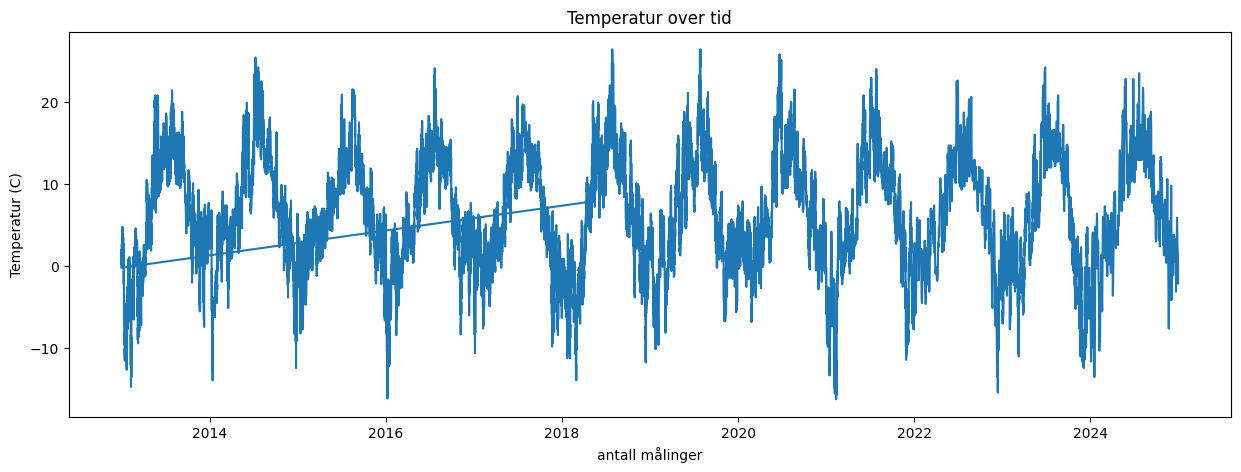

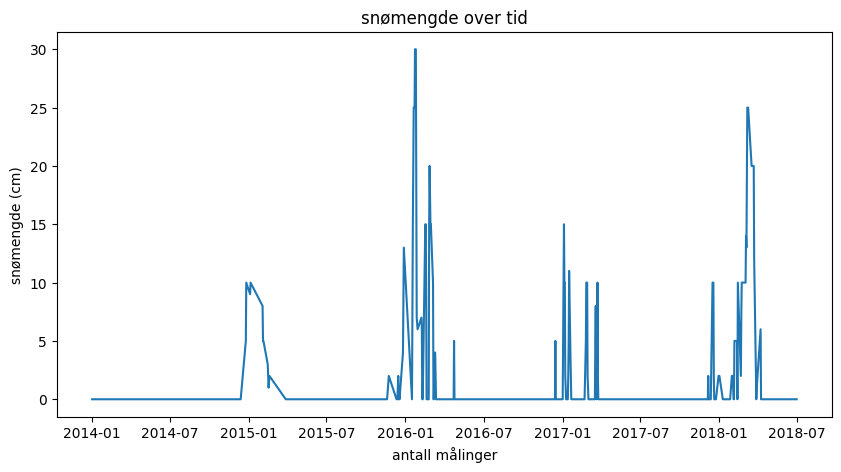

Antall unike tidspunkter: 7990
Totalt antall målinger: 7998


In [12]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

file_path = "https://github.com/PetterOttersen/milj-dataanalyse/raw/refs/heads/main/Excelfil.xlsx"

#Leser data fra den rensa excel filen
data = pd.read_excel(file_path, engine="openpyxl")
    

#Oppretter tomme lister

nedbør=[]
snø=[]

nedbør_tider=[]
snø_tider=[]

temperatur=[]
temp_tider=[]

#Legger til data
for i in range(len(data["elementId"])):
    if data["elementId"][i]=="mean(air_temperature P1D)":
        dato_tid_temp=pd.to_datetime(data["referenceTime"][i])
        offset_temp=pd.to_timedelta(data["timeOffset"][i])
        justert_tid_temp=dato_tid_temp+offset_temp
        temperatur.append(data["value"][i])
        temp_tider.append(justert_tid_temp)
        
    elif data["elementId"][i]=="sum(precipitation_amount P1D)": 
        dato_tid_nedbør=pd.to_datetime(data["referenceTime"][i])
        offset_nedbør=pd.to_timedelta(data["timeOffset"][i])
        justert_tid_nedbør=dato_tid_nedbør+offset_nedbør
        nedbør.append(data["value"][i])
        nedbør_tider.append(justert_tid_nedbør)
         
    elif data["elementId"][i]=="surface_snow_thickness":
        dato_tid_snø=pd.to_datetime(data["referenceTime"][i])
        offset_snø=pd.to_timedelta(data["timeOffset"][i])
        justert_tid_snø=dato_tid_snø+offset_snø
        snø.append(data["value"][i])
        snø_tider.append(justert_tid_snø)
         

#ploter figurene
plt.figure(figsize=(15,5))
plt.plot(nedbør_tider,nedbør)  
plt.title("Nedbørsdata over tid")
plt.xlabel("antall målinger")
plt.ylabel("Nedbør (mm)")

plt.figure(figsize=(15,5))
plt.plot(temp_tider,temperatur)  
plt.title("Temperatur over tid")
plt.xlabel("antall målinger")
plt.ylabel("Temperatur (C)")

plt.figure(figsize=(10,5))
plt.plot(snø_tider,snø)
plt.title("snømengde over tid")
plt.xlabel("antall målinger")
plt.ylabel("snømengde (cm)")

plt.show()

print("Antall unike tidspunkter:", len(set(temp_tider)))
print("Totalt antall målinger:", len(temp_tider))
        


